In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Cleaning and loading the data
# Change this to your local path
df = pd.read_csv(r"C:\Users\bruno\github\SEN1211_project\output\experiment_2.csv", skiprows = 6)

df = df.drop([ 'percentage-stationary-staff', 'alarm?',  
               'verbose?', 'debug?', 'average-response-time',
               'agents-at-start', 'Preferred-exit-door',
               '[step]', 'alerting-range', 
               'max-turtles-per-patch'],1)
changes = {'precision ((count visitors with [evacuating? = false] / count visitors) * 100) 2': 'percentage_evacuating',
           '[run number]': 'run_number'}

# Renaming relevant column
df = df.rename(columns = changes)
df

df.head()

,run_number,percentage-female,percentage-children,percentage-visitors-go-to-preferred-exit,evacuation-duration,event-duration,people-in-building,staff-members-in-building,visitors-in-building,percentage_evacuating
0,1,0,0,96,0,0,450,50,400,100
1,1,0,0,96,0,1,450,50,400,100
2,1,0,0,96,0,2,450,50,400,100
3,1,0,0,96,0,3,450,50,400,100
4,1,0,0,96,0,4,450,50,400,100


In [3]:
# Extracting the maximal evacuation time of each run. 
runs = df.groupby(['run_number']).max()
runs

,percentage-female,percentage-children,percentage-visitors-go-to-preferred-exit,evacuation-duration,event-duration,people-in-building,staff-members-in-building,visitors-in-building,percentage_evacuating
run_number,,,,,,,,,
1,0,0,96,346,376,450,50,400,96.99
2,0,0,96,358,388,450,50,400,98.49
3,0,0,96,368,398,450,50,400,98.74
4,0,0,96,362,392,450,50,400,97.73
5,0,0,96,345,375,450,50,400,<RuntimePrimitiveException>
...,...,...,...,...,...,...,...,...,...
1796,100,100,96,376,406,450,50,400,<RuntimePrimitiveException>
1797,100,100,96,407,437,450,50,400,98.49
1798,100,100,96,413,443,450,50,400,97.49


In [4]:
# Grouping the run maximums over the percentage female 
# to get the average evacuation time of each parameter combination
runs.groupby(['percentage-female']).mean()

,percentage-children,percentage-visitors-go-to-preferred-exit,evacuation-duration,event-duration,people-in-building,staff-members-in-building,visitors-in-building
percentage-female,,,,,,,
0,50.0,96.0,365.026667,395.026667,450.0,50.0,400.0
20,50.0,96.0,367.270000,397.270000,450.0,50.0,400.0
40,50.0,96.0,373.256667,403.256667,450.0,50.0,400.0
60,50.0,96.0,379.256667,409.256667,450.0,50.0,400.0
80,50.0,96.0,381.386667,411.386667,450.0,50.0,400.0
100,50.0,96.0,388.673333,418.673333,450.0,50.0,400.0


In [6]:
# Grouping over percentage female and percentage children, 
# computing the standard diviation for each combination of parameters. 
grouped = runs.groupby(['percentage-female','percentage-children'], as_index = False).std()
pivoted = pd.pivot_table(grouped, index = 'percentage-female', columns = 'percentage-children', values = 'evacuation-duration')
pivoted

percentage-children,0,20,40,60,80,100
percentage-female,,,,,,
0,20.121316,30.762394,30.622954,30.437792,28.279718,25.625243
20,23.811342,27.168026,32.109513,36.145539,27.402525,24.642952
40,21.321485,29.705280,34.718748,22.714412,34.433041,27.686061
60,21.093078,30.193992,25.004171,34.622654,29.243810,26.924755
80,22.297625,30.215120,24.320983,30.154053,33.870100,25.874335
100,18.159936,24.491573,29.138767,39.043508,30.305277,20.671078


In [7]:
# Computing the mean evacuation time for each combination of parameters. 
grouped = runs.groupby(['percentage-female','percentage-children'], as_index = False).mean()
# Pivoting the table... 
pivoted = pd.pivot_table(grouped, index = 'percentage-female', columns = 'percentage-children', values = 'evacuation-duration')
grouped

,percentage-female,percentage-children,percentage-visitors-go-to-preferred-exit,evacuation-duration,event-duration,people-in-building,staff-members-in-building,visitors-in-building
0,0,0,96.0,353.90,383.90,450.0,50.0,400.0
1,0,20,96.0,371.04,401.04,450.0,50.0,400.0
2,0,40,96.0,365.30,395.30,450.0,50.0,400.0
3,0,60,96.0,366.10,396.10,450.0,50.0,400.0
4,0,80,96.0,360.82,390.82,450.0,50.0,400.0
5,0,100,96.0,373.00,403.00,450.0,50.0,400.0
6,20,0,96.0,361.14,391.14,450.0,50.0,400.0
7,20,20,96.0,368.02,398.02,450.0,50.0,400.0
8,20,40,96.0,368.14,398.14,450.0,50.0,400.0
9,20,60,96.0,364.70,394.70,450.0,50.0,400.0


Text(0.5, 0.92, 'Evacuation time in relation to percentage female and children')

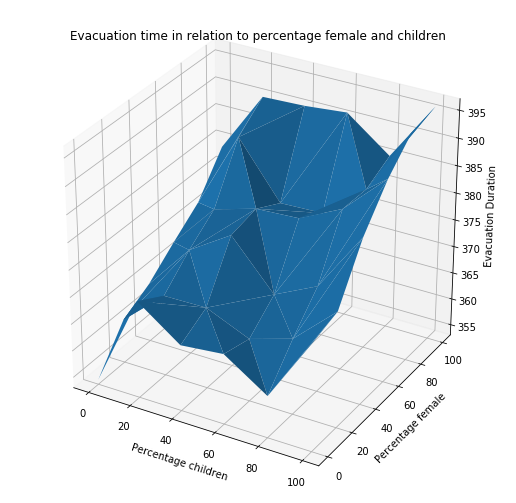

In [8]:
# Making a 3d plot of percentage children and females against evacuation duration. 
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(grouped['percentage-children'],grouped['percentage-female'], grouped['evacuation-duration'])
ax.set_xlabel('Percentage children')
ax.set_ylabel('Percentage female')
ax.set_zlabel('Evacuation Duration')
ax.set_title('Evacuation time in relation to percentage female and children')

In [9]:
# Making a correlation matrix
runs[['percentage-female', 'percentage-children', 'evacuation-duration']].corr()

,percentage-female,percentage-children,evacuation-duration
percentage-female,1.000000,0.000000,0.272392
percentage-children,0.000000,1.000000,0.144249
evacuation-duration,0.272392,0.144249,1.000000


In [10]:
# Estimating a regression model, to see the effect of each parameter. 
# The X variables do not have to be standardized, since they are measured at the same scale. 
X = runs[['percentage-female', 'percentage-children']]
y =  runs['evacuation-duration']
reg = LinearRegression().fit(X, y)
# Returning the regression coefficients
reg.coef_

array([0.23797619, 0.12602381])